In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
%matplotlib inline


def sum_of_square(vec_a, vec_b):
    diff = vec_a - vec_b
    diff_squared = np.square(diff)
    return (np.sum(diff_squared))

df_june = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_june2016.csv")
df_july = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_july2016.csv")
df_aug = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_aug2016.csv")
df_sep = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_sep2016.csv")
df_oct = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_oct2016.csv")
df_nov = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_nov2016.csv")



In [2]:
df = pd.concat([df_june,df_july,df_aug,df_sep,df_oct,df_nov], axis=0)
df.reset_index(inplace=True)
# df.to_csv("check.csv")

In [3]:
df

,index,ObservationId,Timestamp,ParentLocationId,RelatedLocationId,ReadingId,UtcTime,LocalTime,TimeZone,Temperature,...,DewPoint,RelativeHumidity,WindDirection,WindDirectionCompass,WindSpeed,WindGust,RainSince9am,Pressure,RainfallLastHour,RainfallLast10Minutes
0,0,24,1467086400,1,94008,1,6/28/2016 14:00,6/28/2016 14:00,Australia/Hobart,12.000000,...,5.0,62,340,NNW,20,30.0,0.0,1015.0,0.0,0.0
1,1,23,1467090000,1,94008,1,6/28/2016 15:00,6/28/2016 15:00,Australia/Hobart,12.100000,...,5.2,63,340,NNW,18,28.0,0.0,1015.0,0.0,0.0
2,2,22,1467093600,1,94008,1,6/28/2016 16:00,6/28/2016 16:00,Australia/Hobart,11.500000,...,5.4,66,350,N,13,20.0,0.0,1015.0,0.0,0.0
3,3,21,1467097200,1,94008,1,6/28/2016 17:00,6/28/2016 17:00,Australia/Hobart,11.700000,...,5.4,65,350,N,13,20.0,0.0,1016.0,0.0,0.0
4,4,20,1467100800,1,94008,1,6/28/2016 18:00,6/28/2016 18:00,Australia/Hobart,10.900000,...,7.8,81,180,S,24,35.0,0.0,1017.0,0.0,0.0
5,5,19,1467104400,1,94008,1,6/28/2016 19:00,6/28/2016 19:00,Australia/Hobart,9.800000,...,8.6,92,330,NNW,9,11.0,0.2,1017.0,0.2,0.2
6,6,18,1467108000,1,94008,1,6/28/2016 20:00,6/28/2016 20:00,Australia/Hobart,9.700000,...,8.3,91,20,NNE,9,15.0,0.6,1017.0,0.4,0.4
7,7,17,1467111600,1,94008,1,6/28/2016 21:00,6/28/2016 21:00,Australia/Hobart,9.300000,...,7.6,89,330,NNW,9,15.0,0.8,1018.0,0.2,0.2
8,8,16,1467115200,1,94008,1,6/28/2016 22:00,6/28/2016 22:00,Australia/Hobart,10.400000,...,6.8,78,330,NNW,11,15.0,0.8,1019.0,0.0,0.0
9,9,15,1467118800,1,94008,1,6/28/2016 23:00,6/28/2016 23:00,Australia/Hobart,10.600000,...,7.5,81,320,NW,20,28.0,0.8,1019.0,0.0,0.0


In [4]:
# Adding variables to pandas dataframe
df['y_t_1'] = df.Temperature.shift(-1) # y_(t+1)
df['y_t_2'] = df.Temperature.shift(-2) # y_(t+2)
df['y_t_3'] = df.Temperature.shift(-3) # y_(t+3)
df['y_t_4'] = df.Temperature.shift(-4) # y_(t+4)
df['y_t_5'] = df.Temperature.shift(-5) # y_(t+5)

# Adding past variables of order_1 (o1)

# columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 
#          'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

df['FeelsLike_o1'] = df.FeelsLike.shift(1) # t-1
df['DewPoint_o1'] = df.DewPoint.shift(1) # t-1
df['RelativeHumidity_o1'] = df.RelativeHumidity.shift(1) # t-1
df['WindSpeed_o1'] = df.WindSpeed.shift(1) # t-1
df['WindGust_o1'] = df.WindGust.shift(1) # t-1
df['RainSince9am_o1'] = df.RainSince9am.shift(1) # t-1
df['Pressure_o1'] = df.Pressure.shift(1) # t-1
df['RainfallLastHour_o1'] = df.RainfallLastHour.shift(1) # t-1
df['RainfallLast10Minutes_o1'] = df.RainfallLast10Minutes.shift(1) # t-1



In [5]:
# df
# df.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\check.csv")

In [6]:
# Drop nans
df = df.dropna()
df.reset_index(inplace=True)
# df.head(5)
# df.to_csv('July2016_pandas_df_for_visualisation_order1_nans_dropped.csv')
# df.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\check.csv")

In [7]:
y_gt = df.as_matrix(columns=['Temperature'])

tot_points = y_gt.shape[0]
# train_points = 2265 # training until september
train_points = 3600
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

3623 3600 23


In [8]:
df_train = df.loc[0:train_points]
df_test = df.loc[train_points + 1:tot_points]
#df.head(6)
# df
# print(linear_model.LinearRegression.__doc__)
# df.keys()

In [9]:
# df_test

In [10]:
# df.to_csv('July2016_pandas_df.csv')
print(df.columns)

Index(['level_0', 'index', 'ObservationId', 'Timestamp', 'ParentLocationId',
       'RelatedLocationId', 'ReadingId', 'UtcTime', 'LocalTime', 'TimeZone',
       'Temperature', 'FeelsLike', 'DewPoint', 'RelativeHumidity',
       'WindDirection', 'WindDirectionCompass', 'WindSpeed', 'WindGust',
       'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes',
       'y_t_1', 'y_t_2', 'y_t_3', 'y_t_4', 'y_t_5', 'FeelsLike_o1',
       'DewPoint_o1', 'RelativeHumidity_o1', 'WindSpeed_o1', 'WindGust_o1',
       'RainSince9am_o1', 'Pressure_o1', 'RainfallLastHour_o1',
       'RainfallLast10Minutes_o1'],
      dtype='object')


In [11]:
print(y_gt.shape)

(3623, 1)


In [12]:
# Dropping variables that are not used for training
df = df.drop('level_0',axis=1)
df = df.drop('index',axis=1)
df = df.drop('ObservationId',axis=1)
df = df.drop('Timestamp',axis=1)
df = df.drop('ParentLocationId',axis=1)
df = df.drop('RelatedLocationId',axis=1)
df = df.drop('ReadingId',axis=1)
df = df.drop('UtcTime',axis=1)
df = df.drop('LocalTime',axis=1)
df = df.drop('TimeZone',axis=1)
df = df.drop('WindDirection',axis=1)
df = df.drop('WindDirectionCompass',axis=1)

In [13]:
df.columns

Index(['Temperature', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed',
       'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour',
       'RainfallLast10Minutes', 'y_t_1', 'y_t_2', 'y_t_3', 'y_t_4', 'y_t_5',
       'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1', 'WindSpeed_o1',
       'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1', 'RainfallLastHour_o1',
       'RainfallLast10Minutes_o1'],
      dtype='object')

In [14]:
# x = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

# x_t1 = df.as_matrix(columns=['time_index', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'Pressure'])
# x_t1 = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
# x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
# x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes')
x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes', 'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1','WindSpeed_o1', 'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1','RainfallLastHour_o1', 'RainfallLast10Minutes_o1'])


# Do scaling according to min-max scaling
scaler_minmax = preprocessing.MinMaxScaler()
x_t1 = scaler_minmax.fit_transform(x_t1)

# Add polynomials
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_t1 = poly.fit_transform(x_t1)

# get the vectors for five-hour forecast
y_gt_t1 = df.as_matrix(columns=[df.y_t_1.name])
y_gt_t2 = df.as_matrix(columns=[df.y_t_2.name])
y_gt_t3 = df.as_matrix(columns=[df.y_t_3.name])
y_gt_t4 = df.as_matrix(columns=[df.y_t_4.name])
y_gt_t5 = df.as_matrix(columns=[df.y_t_5.name])

print(x_t1.shape)
print(y_gt_t1.shape)
print(y_gt_t2.shape)
print(y_gt_t3.shape)
print(y_gt_t4.shape)
print(y_gt_t5.shape)

(3623, 172)
(3623, 1)
(3623, 1)
(3623, 1)
(3623, 1)
(3623, 1)


In [15]:
# x_t1[743:744,:]
# y_gt_t1[0:744,:]
# print(y_gt_t1.shape[0],y_gt_t1.shape[1])
# print(x_t1[1:2,:])

In [16]:
# Generate Train Sequence
x_t1_train = x_t1[0:train_points + 1,:]
y_gt_t1_train = y_gt_t1[0:train_points + 1,:]
y_gt_t2_train = y_gt_t2[0:train_points + 1,:]
y_gt_t3_train = y_gt_t3[0:train_points + 1,:]
y_gt_t4_train = y_gt_t4[0:train_points + 1,:]
y_gt_t5_train = y_gt_t5[0:train_points + 1,:]




# Generate Test Sequence
x_t1_test = x_t1[train_points + 1:tot_points + 1 ,:]
y_t1_test = y_gt_t1[train_points + 1:tot_points + 1,:]
y_t2_test = y_gt_t2[train_points + 1:tot_points + 1,:]
y_t3_test = y_gt_t3[train_points + 1:tot_points + 1,:]
y_t4_test = y_gt_t4[train_points + 1:tot_points + 1,:]
y_t5_test = y_gt_t5[train_points + 1:tot_points + 1,:]


print(x_t1_train.shape, y_gt_t1_train.shape, y_gt_t2_train.shape, y_gt_t3_train.shape, y_gt_t4_train.shape, y_gt_t5_train.shape)
print(x_t1_test.shape, y_t1_test.shape, y_t2_test.shape, y_t3_test.shape, y_t4_test.shape, y_t5_test.shape)

(3601, 172) (3601, 1) (3601, 1) (3601, 1) (3601, 1) (3601, 1)
(22, 172) (22, 1) (22, 1) (22, 1) (22, 1) (22, 1)


In [17]:
# print(y_gt_t4_train[0:5,:])
# print(x_t1_test[0])
# print(y_gt_t1_train)
# print(y_t1_test)

In [18]:
# call linear regression for five forecasts
obj_1 = linear_model.LinearRegression()
obj_1.fit(x_t1_train,y_gt_t1_train)

obj_2 = linear_model.LinearRegression()
obj_2.fit(x_t1_train,y_gt_t2_train)

obj_3 = linear_model.LinearRegression()
obj_3.fit(x_t1_train,y_gt_t3_train)

obj_4 = linear_model.LinearRegression()
obj_4.fit(x_t1_train,y_gt_t4_train)

obj_5 = linear_model.LinearRegression()
obj_5.fit(x_t1_train,y_gt_t5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# regression_object.predict(x)[0:5] predict first five data vectors
test_ind = 0;
ybar_1 = obj_1.predict(x_t1_test)[test_ind]
ybar_2 = obj_2.predict(x_t1_test)[test_ind]
ybar_3 = obj_3.predict(x_t1_test)[test_ind]
ybar_4 = obj_4.predict(x_t1_test)[test_ind]
ybar_5 = obj_5.predict(x_t1_test)[test_ind]
print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

# get groundtruth vector
y_gt_vec = np.empty(5)
y_gt_vec[0] = y_t1_test[test_ind]
y_gt_vec[1] = y_t2_test[test_ind]
y_gt_vec[2] = y_t3_test[test_ind]
y_gt_vec[3] = y_t4_test[test_ind]
y_gt_vec[4] = y_t5_test[test_ind]
print(y_gt_vec)

# get prediction vector
y_pred_vec = np.empty(5)
y_pred_vec[0] = ybar_1
y_pred_vec[1] = ybar_2
y_pred_vec[2] = ybar_3
y_pred_vec[3] = ybar_4
y_pred_vec[4] = ybar_5

# print(y_pred_vec)

# print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
sse = sum_of_square(y_pred_vec, y_gt_vec)
print('from function, sse = %f\n' %(sse) )

[ 16.15947997] [ 16.43016104] [ 16.91251345] [ 16.73267651] [ 16.57420618]
[ 16.79999924  17.39999962  18.29999924  18.89999962  19.29999924]
from function, sse = 15.403206



In [20]:
print('total test_points = %d\n' %(test_points))
sse_list=[]
for test_instance in range(0,test_points-1):
    test_ind = test_instance
    ybar_1 = obj_1.predict(x_t1_test)[test_ind]
    ybar_2 = obj_2.predict(x_t1_test)[test_ind]
    ybar_3 = obj_3.predict(x_t1_test)[test_ind]
    ybar_4 = obj_4.predict(x_t1_test)[test_ind]
    ybar_5 = obj_5.predict(x_t1_test)[test_ind]
    print('ex# %d: ' %(test_instance))
    # print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

    # get groundtruth vector
    y_gt_vec = np.empty(5)
    y_gt_vec[0] = y_t1_test[test_ind]
    y_gt_vec[1] = y_t2_test[test_ind]
    y_gt_vec[2] = y_t3_test[test_ind]
    y_gt_vec[3] = y_t4_test[test_ind]
    y_gt_vec[4] = y_t5_test[test_ind]
    print(y_gt_vec)

    # get prediction vector
    y_pred_vec = np.empty(5)
    y_pred_vec[0] = ybar_1
    y_pred_vec[1] = ybar_2
    y_pred_vec[2] = ybar_3
    y_pred_vec[3] = ybar_4
    y_pred_vec[4] = ybar_5

    print(y_pred_vec)

    # print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
    sse = sum_of_square(y_pred_vec, y_gt_vec)
    sse_list.append(sse)
    print('sse = %f\n' %(sse) )
    

total test_points = 23

ex# 0: 
[ 16.79999924  17.39999962  18.29999924  18.89999962  19.29999924]
[ 16.15947997  16.43016104  16.91251345  16.73267651  16.57420618]
sse = 15.403206

ex# 1: 
[ 17.39999962  18.29999924  18.89999962  19.29999924  19.        ]
[ 16.94258837  17.22454283  17.16737854  16.79608432  16.68443255]
sse = 15.999250

ex# 2: 
[ 18.29999924  18.89999962  19.29999924  19.          19.        ]
[ 17.46357839  17.20748205  16.74518825  16.27176476  15.75362917]
sse = 28.073466

ex# 3: 
[ 18.89999962  19.29999924  19.          19.          19.89999962]
[ 18.31740217  18.01771223  17.65273019  17.12903031  16.52790955]
sse = 18.670335

ex# 4: 
[ 19.29999924  19.          19.          19.89999962  18.70000076]
[ 18.57754207  18.13184616  17.68527774  17.1851135   16.61132809]
sse = 14.737290

ex# 5: 
[ 19.          19.          19.89999962  18.70000076  17.89999962]
[ 19.32918175  19.10143416  18.612268    18.18615629  17.65755313]
sse = 2.099719

ex# 6: 
[ 19.          

In [21]:
# Generate test data from other files
# test here

# loc_30 - Sep 2016
# df_test = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_30\\sampled_each_hour\\WeatherData_loc30_sep2016.csv")

# loc_30 - Oct 2016
# df_test = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_30\\sampled_each_hour\\WeatherData_loc30_oct2016.csv")

# loc_30 - Nov 2016
df_test = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_30\\sampled_each_hour\\WeatherData_loc30_nov2016.csv")

# Adding variables to pandas dataframe
df_test['y_t_1'] = df_test.Temperature.shift(-1) # y_(t+1)
df_test['y_t_2'] = df_test.Temperature.shift(-2) # y_(t+2)
df_test['y_t_3'] = df_test.Temperature.shift(-3) # y_(t+3)
df_test['y_t_4'] = df_test.Temperature.shift(-4) # y_(t+4)
df_test['y_t_5'] = df_test.Temperature.shift(-5) # y_(t+5)

# Adding past variables of order_1 (o1)

# columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 
#          'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

df_test['FeelsLike_o1'] = df_test.FeelsLike.shift(1) # t-1
df_test['DewPoint_o1'] = df_test.DewPoint.shift(1) # t-1
df_test['RelativeHumidity_o1'] = df_test.RelativeHumidity.shift(1) # t-1
df_test['WindSpeed_o1'] = df_test.WindSpeed.shift(1) # t-1
df_test['WindGust_o1'] = df_test.WindGust.shift(1) # t-1
df_test['RainSince9am_o1'] = df_test.RainSince9am.shift(1) # t-1
df_test['Pressure_o1'] = df_test.Pressure.shift(1) # t-1
df_test['RainfallLastHour_o1'] = df_test.RainfallLastHour.shift(1) # t-1
df_test['RainfallLast10Minutes_o1'] = df_test.RainfallLast10Minutes.shift(1) # t-1



In [22]:
df_test

,ObservationId,Timestamp,ParentLocationId,RelatedLocationId,ReadingId,UtcTime,LocalTime,TimeZone,Temperature,FeelsLike,...,y_t_5,FeelsLike_o1,DewPoint_o1,RelativeHumidity_o1,WindSpeed_o1,WindGust_o1,RainSince9am_o1,Pressure_o1,RainfallLastHour_o1,RainfallLast10Minutes_o1
0,225238,1477918800,30,60141,312896,11/1/2016 0:00,11/1/2016 0:00,Australia/Sydney,20.200001,20.200001,...,20.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,225449,1477922400,30,60141,313172,11/1/2016 1:00,11/1/2016 1:00,Australia/Sydney,21.600000,21.600000,...,18.700001,20.200001,14.100000,68.0,15.0,19.0,0.0,1012.0,0.0,0.0
2,225657,1477926000,30,60141,313448,11/1/2016 2:00,11/1/2016 2:00,Australia/Sydney,21.299999,21.299999,...,18.500000,21.600000,14.700000,65.0,20.0,28.0,0.0,1011.0,0.0,0.0
3,225886,1477929600,30,60141,313724,11/1/2016 3:00,11/1/2016 3:00,Australia/Sydney,21.500000,21.500000,...,17.500000,21.299999,15.400000,69.0,24.0,32.0,0.0,1010.0,0.0,0.0
4,226115,1477933200,30,60141,314046,11/1/2016 4:00,11/1/2016 4:00,Australia/Sydney,21.700001,21.700001,...,16.900000,21.500000,14.900000,66.0,24.0,33.0,0.0,1009.0,0.0,0.0
5,226319,1477937400,30,60141,314414,11/1/2016 5:10,11/1/2016 5:10,Australia/Sydney,20.600000,20.600000,...,16.299999,21.700001,14.800000,65.0,28.0,35.0,0.0,1008.0,0.0,0.0
6,226477,1477940400,30,60141,314644,11/1/2016 6:00,11/1/2016 6:00,Australia/Sydney,18.700001,18.700001,...,16.100000,20.600000,15.600000,73.0,28.0,32.0,0.0,1007.0,0.0,0.0
7,226687,1477944000,30,60141,314920,11/1/2016 7:00,11/1/2016 7:00,Australia/Sydney,18.500000,18.500000,...,15.700000,18.700001,17.000000,90.0,15.0,20.0,0.0,1008.0,0.0,0.0
8,226861,1477948200,30,60141,315196,11/1/2016 8:10,11/1/2016 8:10,Australia/Sydney,17.500000,17.500000,...,15.200000,18.500000,16.299999,87.0,13.0,17.0,4.4,1008.0,0.0,0.0
9,227039,1477951200,30,60141,315472,11/1/2016 9:00,11/1/2016 9:00,Australia/Sydney,16.900000,16.900000,...,14.300000,17.500000,15.300000,87.0,13.0,15.0,4.4,1009.0,0.0,0.0


In [23]:
# Drop nans
df_test = df_test.dropna()
df_test.reset_index(inplace=True)


In [24]:
df_test

,index,ObservationId,Timestamp,ParentLocationId,RelatedLocationId,ReadingId,UtcTime,LocalTime,TimeZone,Temperature,...,y_t_5,FeelsLike_o1,DewPoint_o1,RelativeHumidity_o1,WindSpeed_o1,WindGust_o1,RainSince9am_o1,Pressure_o1,RainfallLastHour_o1,RainfallLast10Minutes_o1
0,1,225449,1477922400,30,60141,313172,11/1/2016 1:00,11/1/2016 1:00,Australia/Sydney,21.600000,...,18.700001,20.200001,14.100000,68.0,15.0,19.0,0.0,1012.0,0.0,0.0
1,2,225657,1477926000,30,60141,313448,11/1/2016 2:00,11/1/2016 2:00,Australia/Sydney,21.299999,...,18.500000,21.600000,14.700000,65.0,20.0,28.0,0.0,1011.0,0.0,0.0
2,3,225886,1477929600,30,60141,313724,11/1/2016 3:00,11/1/2016 3:00,Australia/Sydney,21.500000,...,17.500000,21.299999,15.400000,69.0,24.0,32.0,0.0,1010.0,0.0,0.0
3,4,226115,1477933200,30,60141,314046,11/1/2016 4:00,11/1/2016 4:00,Australia/Sydney,21.700001,...,16.900000,21.500000,14.900000,66.0,24.0,33.0,0.0,1009.0,0.0,0.0
4,5,226319,1477937400,30,60141,314414,11/1/2016 5:10,11/1/2016 5:10,Australia/Sydney,20.600000,...,16.299999,21.700001,14.800000,65.0,28.0,35.0,0.0,1008.0,0.0,0.0
5,6,226477,1477940400,30,60141,314644,11/1/2016 6:00,11/1/2016 6:00,Australia/Sydney,18.700001,...,16.100000,20.600000,15.600000,73.0,28.0,32.0,0.0,1007.0,0.0,0.0
6,7,226687,1477944000,30,60141,314920,11/1/2016 7:00,11/1/2016 7:00,Australia/Sydney,18.500000,...,15.700000,18.700001,17.000000,90.0,15.0,20.0,0.0,1008.0,0.0,0.0
7,8,226861,1477948200,30,60141,315196,11/1/2016 8:10,11/1/2016 8:10,Australia/Sydney,17.500000,...,15.200000,18.500000,16.299999,87.0,13.0,17.0,4.4,1008.0,0.0,0.0
8,9,227039,1477951200,30,60141,315472,11/1/2016 9:00,11/1/2016 9:00,Australia/Sydney,16.900000,...,14.300000,17.500000,15.300000,87.0,13.0,15.0,4.4,1009.0,0.0,0.0
9,10,227251,1477955400,30,60141,315794,11/1/2016 10:10,11/1/2016 10:10,Australia/Sydney,16.299999,...,14.100000,16.900000,15.100000,89.0,7.0,9.0,4.4,1010.0,0.0,0.0


In [25]:
# points in test file (NaNs removed)
y_test = df_test.as_matrix(columns=['Temperature'])
test_points = y_test.shape[0]
print(test_points)
print(df_test.columns)

642
Index(['index', 'ObservationId', 'Timestamp', 'ParentLocationId',
       'RelatedLocationId', 'ReadingId', 'UtcTime', 'LocalTime', 'TimeZone',
       'Temperature', 'FeelsLike', 'DewPoint', 'RelativeHumidity',
       'WindDirection', 'WindDirectionCompass', 'WindSpeed', 'WindGust',
       'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes',
       'y_t_1', 'y_t_2', 'y_t_3', 'y_t_4', 'y_t_5', 'FeelsLike_o1',
       'DewPoint_o1', 'RelativeHumidity_o1', 'WindSpeed_o1', 'WindGust_o1',
       'RainSince9am_o1', 'Pressure_o1', 'RainfallLastHour_o1',
       'RainfallLast10Minutes_o1'],
      dtype='object')


In [26]:
# Dropping variables that were not used for training
# df_test = df_test.drop('level_0',axis=1)
df_test = df_test.drop('index',axis=1)
df_test = df_test.drop('ObservationId',axis=1)
df_test = df_test.drop('Timestamp',axis=1)
df_test = df_test.drop('ParentLocationId',axis=1)
df_test = df_test.drop('RelatedLocationId',axis=1)
df_test = df_test.drop('ReadingId',axis=1)
df_test = df_test.drop('UtcTime',axis=1)
df_test = df_test.drop('LocalTime',axis=1)
df_test = df_test.drop('TimeZone',axis=1)
df_test = df_test.drop('WindDirection',axis=1)
df_test = df_test.drop('WindDirectionCompass',axis=1)

In [27]:
# MUST match training
x_test = df_test.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes', 'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1','WindSpeed_o1', 'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1','RainfallLastHour_o1', 'RainfallLast10Minutes_o1'])


# Apply the same scaling that was used in training
x_test_minmax = scaler_minmax.transform(x_test)

# Add polynomials
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_test_minmax = poly.fit_transform(x_test_minmax)

# get the vectors for the groundtruth comparison for five-hour forecast
y_t1 = df_test.as_matrix(columns=[df_test.y_t_1.name])
y_t2 = df_test.as_matrix(columns=[df_test.y_t_2.name])
y_t3 = df_test.as_matrix(columns=[df_test.y_t_3.name])
y_t4 = df_test.as_matrix(columns=[df_test.y_t_4.name])
y_t5 = df_test.as_matrix(columns=[df_test.y_t_5.name])

print(x_test_minmax.shape)
print(y_t1.shape)
print(y_t2.shape)
print(y_t3.shape)
print(y_t4.shape)
print(y_t5.shape)

(642, 172)
(642, 1)
(642, 1)
(642, 1)
(642, 1)
(642, 1)


In [28]:
test_points = len(y_t1)
print('total test_points = %d\n' %(test_points))
sse_list=[]
for test_instance in range(0,test_points-1):
    test_ind = test_instance
    ybar_1 = obj_1.predict(x_test_minmax)[test_ind]
    ybar_2 = obj_2.predict(x_test_minmax)[test_ind]
    ybar_3 = obj_3.predict(x_test_minmax)[test_ind]
    ybar_4 = obj_4.predict(x_test_minmax)[test_ind]
    ybar_5 = obj_5.predict(x_test_minmax)[test_ind]
    print('ex# %d: ' %(test_instance))
    # print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

    # get groundtruth vector
    y_gt_vec = np.empty(5)
    y_gt_vec[0] = y_t1[test_ind]
    y_gt_vec[1] = y_t2[test_ind]
    y_gt_vec[2] = y_t3[test_ind]
    y_gt_vec[3] = y_t4[test_ind]
    y_gt_vec[4] = y_t5[test_ind]
    print(y_gt_vec)

    # get prediction vector
    y_pred_vec = np.empty(5)
    y_pred_vec[0] = ybar_1
    y_pred_vec[1] = ybar_2
    y_pred_vec[2] = ybar_3
    y_pred_vec[3] = ybar_4
    y_pred_vec[4] = ybar_5

    print(y_pred_vec)

    # print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
    sse = sum_of_square(y_pred_vec, y_gt_vec)
    sse_list.append(sse)
    print('sse = %f\n' %(np.sqrt(sse) ) )

total test_points = 642

ex# 0: 
[ 21.29999924  21.5         21.70000076  20.60000038  18.70000076]
[ 22.12446882  22.51068541  22.65801637  22.53333118  22.23571157]
sse = 4.342585

ex# 1: 
[ 21.5         21.70000076  20.60000038  18.70000076  18.5       ]
[ 21.34075434  21.61822789  21.42730024  21.26821989  20.86182898]
sse = 3.590328

ex# 2: 
[ 21.70000076  20.60000038  18.70000076  18.5         17.5       ]
[ 21.69888984  21.71617391  21.62183587  21.15997052  20.58418701]
sse = 5.135233

ex# 3: 
[ 20.60000038  18.70000076  18.5         17.5         16.89999962]
[ 21.79266509  21.90339511  21.73946878  21.36799903  20.82966547]
sse = 7.251347

ex# 4: 
[ 18.70000076  18.5         17.5         16.89999962  16.29999924]
[ 20.40163964  20.51829946  20.05648877  19.56584469  18.9607073 ]
sse = 5.262209

ex# 5: 
[ 18.5         17.5         16.89999962  16.29999924  16.10000038]
[ 18.00015129  17.67858408  16.92704599  16.68678972  15.36642797]
sse = 0.984991

ex# 6: 
[ 17.5         16.8

In [43]:
# print(sse_list)

ex# 640: 
[ 13.39999962  13.19999981  13.19999981  14.5         17.89999962]
[ 13.70505743  13.12230188  12.69443706  12.23748681  11.59373191]


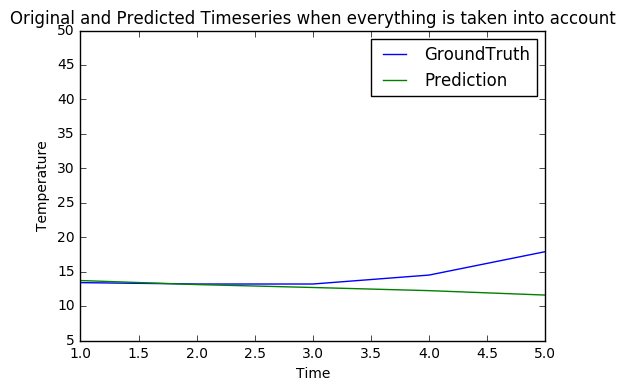

In [47]:
test_ind = 15
ybar_1 = obj_1.predict(x_test_minmax)[test_ind]
ybar_2 = obj_2.predict(x_test_minmax)[test_ind]
ybar_3 = obj_3.predict(x_test_minmax)[test_ind]
ybar_4 = obj_4.predict(x_test_minmax)[test_ind]
ybar_5 = obj_5.predict(x_test_minmax)[test_ind]
print('ex# %d: ' %(test_instance))
# print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

# get groundtruth vector
y_gt_vec = np.empty(5)
y_gt_vec[0] = y_t1[test_ind]
y_gt_vec[1] = y_t2[test_ind]
y_gt_vec[2] = y_t3[test_ind]
y_gt_vec[3] = y_t4[test_ind]
y_gt_vec[4] = y_t5[test_ind]
print(y_gt_vec)

# get prediction vector
y_pred_vec = np.empty(5)
y_pred_vec[0] = ybar_1
y_pred_vec[1] = ybar_2
y_pred_vec[2] = ybar_3
y_pred_vec[3] = ybar_4
y_pred_vec[4] = ybar_5

print(y_pred_vec)

# Graph
# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(1,6,1)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.ylim(ymin=5)
plt.ylim(ymax=50)
plt.legend()
plt.title('Original and Predicted Timeseries when everything is taken into account')

In [38]:
# plt.scatter(y_gt_vec,y_pred_vec)
# plt.xlabel('Groundtruth')
# plt.ylabel('Prediction')
# plt.title('Groundtruth vs Prediction')

In [77]:
# print(regression_object.predict(x)[105:109])
# print(regression_object.coef_)
# print(x[0:1,:].shape)

In [78]:
# use y_predict = coeffs*X + intercept for prediction and see if you have gotten their format

# obs = 105; # 1st observation
# data_vector = x[obs:obs+1,:] # Rank-2 view of data_vector
# intercept = regression_object.intercept_
# coeffs = regression_object.coef_
# print(data_vector.shape, coeffs.shape)
# print(data_vector, coeffs)
# print(np.dot(data_vector[0],coeffs[0]))

# Handling numpy arrays
# coeffs_1Darray = coeffs[0]
# data_vector_1Darray = data_vector[0]

# y_predict = (np.dot(coeffs_1Darray,data_vector_1Darray)) + intercept
# print('prediction = %f\n' %y_predict)

In [79]:
# Printing the first column of data matrix, which is time
# x[:,0:1]
# pred_y 

In [29]:
# df_test
# print(time_index)
# print(y_gt_vec)
# print(y_pred_vec)

In [82]:
# scatter plots of data 
# str_text='RainfallLast10Minutes'
# plt.scatter(y_gt_t1_train,df.as_matrix(columns=[str_text]),color='r')
# plt.xlabel('Temperature')
# plt.ylabel(str_text)

In [83]:
# df.as_matrix(columns=['Temperature'])